In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

Aplicación de un filtro ideal

En este ejemplo se realizará el filtrado de una señal aplicando un filtro "ideal" en el dominio de la frecuencia.

Inicialmente se crea el intervalo de tiempo dicreto y la señal a filtrar:

1. se representarán 128 muestras
2. la señal está compuesta por 2 frecuencias diferentes

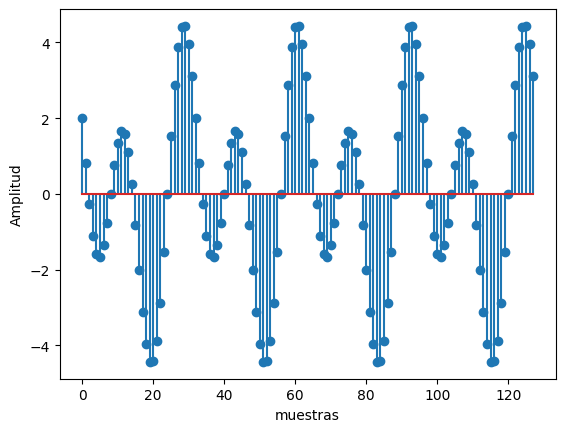

In [2]:
N = 128
n = np.arange(0,N)

#frecuencias
f1 = 1.0/32.0
f2 = 1.0/16.0

# señal de prueba
xn = 2.0 * np.cos(2.0*np.pi*f1*n) -3.0 * np.sin(2.0*np.pi*f2*n)
plt.figure(1)
plt.stem(n,xn)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()

 A partir de las muestras de la señal se obtiene la representación en frecuencia mediante la FFT

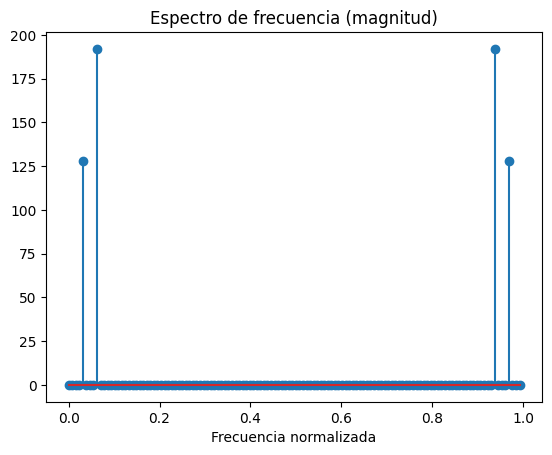

In [3]:
xk = np.fft.fft(xn)
k = n/N

plt.figure(2)
plt.stem(k,abs(xk))
plt.xlabel('Frecuencia normalizada')
plt.title('Espectro de frecuencia (magnitud)')
plt.show()

Observe los dos picos predominates ubicados en los valores correspondientes a f1 y f2.

Observe la relación existente entre el número de muestras y la amplitud de los armónicos.

A continuación se aplicará un filtro pasa-bajos directamente sobre el dominio de la frecuencia, observe que se aplica como un umbral que convierte en cero cualqier armónico por arriba de la frecuencia de corte. Advierta que el espectro es simétrico y por lo tanto las operaciones tambien deben ser aplicadas en simetría

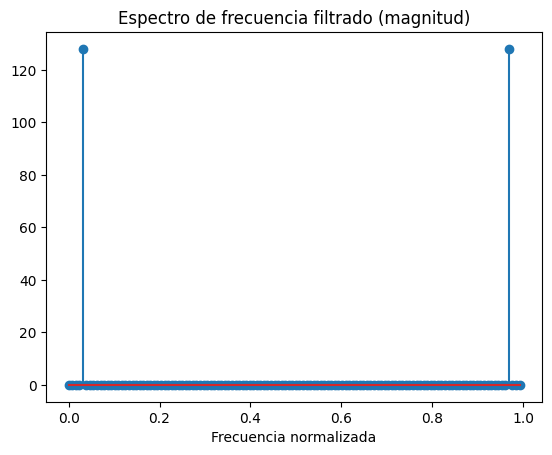

In [4]:
wcb = 1.0/16.0 # frecuencia de corte
wct = np.floor(wcb*N)
xkfb = xk.copy()

for i in range(0,N):
    if i>=wct and i<=(N-wct):
        xkfb[i] = complex(0.0,0.0)

plt.figure(3)
plt.stem(k,abs(xkfb))
plt.xlabel('Frecuencia normalizada')
plt.title('Espectro de frecuencia filtrado (magnitud)')
plt.show()

Una vez se tiene el espectro filtrado de la señal, se procede a reconstruir la señal en el dominio temporal usando la FFT inversa

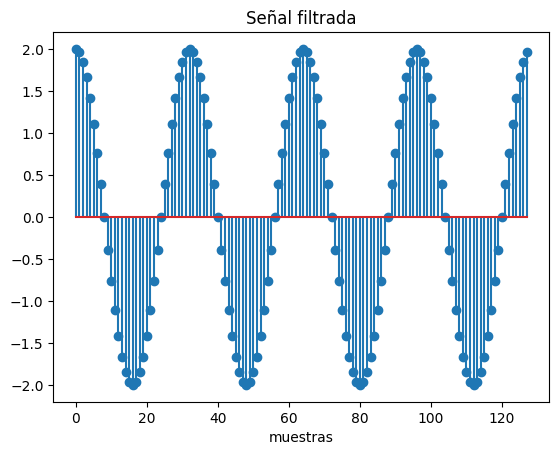

In [5]:
xnfb = np.fft.ifft(xkfb)
plt.figure(4)
plt.stem(n,xnfb.real)
plt.xlabel('muestras')
plt.title('Señal filtrada')
plt.show()

Ahora se aplicará un filtro pasa-altos a la misma señal. Compare con el filtro pasa-bajos

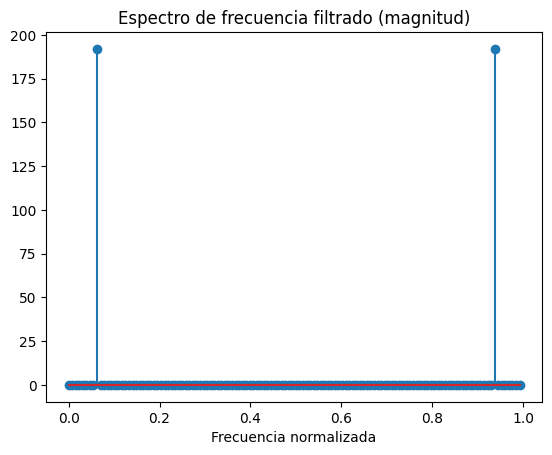

In [6]:
wca = 1.0/16.0
wct = np.floor(wca*N)
xkfa = xk.copy()

for i in range(0,N):
    if i<wct or i>(N-wct):
        xkfa[i] = complex(0.0,0.0)


plt.figure(5)
plt.stem(k,abs(xkfa))
plt.xlabel('Frecuencia normalizada')
plt.title('Espectro de frecuencia filtrado (magnitud)')
plt.show()

Una vez se tiene el espectro filtrado de la señal, se procede a reconstruir la señal en el dominio temporal usando la FFT inversa

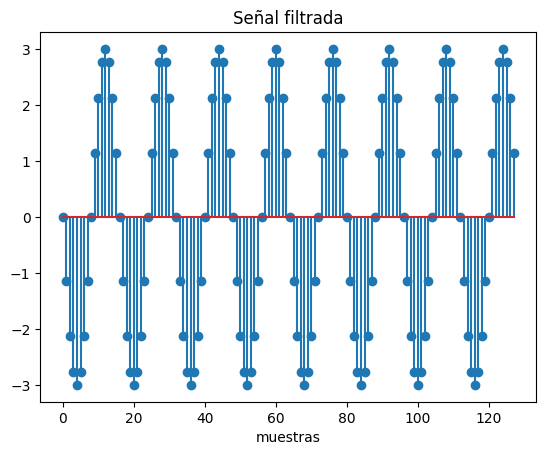

In [7]:
xnfa = np.fft.ifft(xkfa)
plt.figure(5)
plt.stem(n,xnfa.real)
plt.xlabel('muestras')
plt.title('Señal filtrada')
plt.show()